In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
! wget https://raw.githubusercontent.com/vanessagiovani/machinelearning/main/iris.csv

Process the data

In [5]:
data = pd.read_csv("iris.csv")

for i in data:
  print(i, data[i].dtypes, data[i].isna().sum())

print(data.info())
print(data.describe())

sepal_length float64 0
sepal_width float64 0
petal_length float64 0
petal_width float64 0
species object 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        

In [13]:
# convert nominal

encode = preprocessing.LabelEncoder()
data["species"] = encode.fit_transform(data["species"])

for i in data:
  print(i, data[i].dtypes, data[i].isna().sum())

sepal_length float64 0
sepal_width float64 0
petal_length float64 0
petal_width float64 0
species int64 0


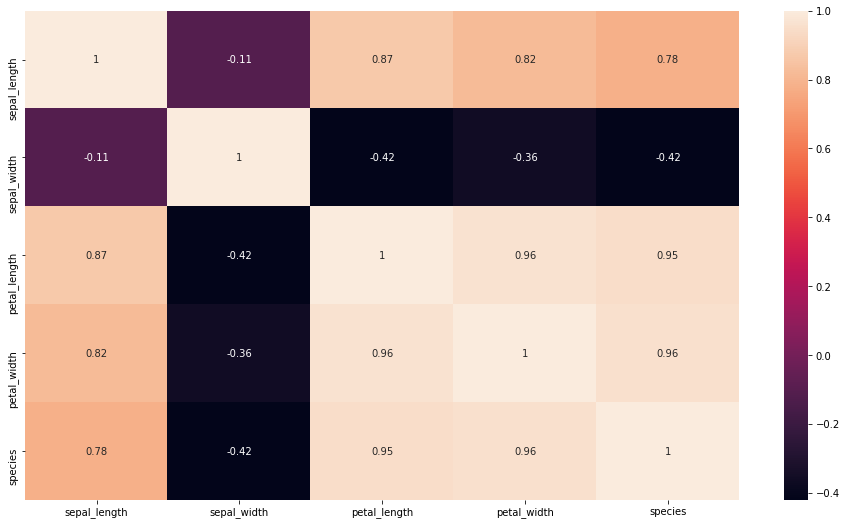

In [14]:
corr_matrix = data.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()

X = data[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y = data["species"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)

KNN

In [17]:
KNN = KNeighborsClassifier(n_neighbors = 3).fit(XTrain, YTrain)
CTest  = KNN.predict(XTest)
CTrain  = KNN.predict(XTrain)
print("Train Accuracy: ", metrics.accuracy_score(YTrain, CTrain))
print("Test Accuracy: ", metrics.accuracy_score(YTest, CTest))

Train Accuracy:  0.9666666666666667
Test Accuracy:  0.9666666666666667


In [20]:
Ks = 30
accTrain = np.zeros((Ks-1))
accTest = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):    
    KNN = KNeighborsClassifier(n_neighbors = n).fit(XTrain, YTrain)
    CTest  = KNN.predict(XTest)
    CTrain  = KNN.predict(XTrain)
    accTrain[n - 1] = metrics.accuracy_score(YTrain, CTrain)
    accTest[n - 1] = metrics.accuracy_score(YTest, CTest)
    
print("Best ACC Training : %.2f" % accTrain.max(), ", with k=", accTrain.argmax() + 1)
print("Best ACC Testing : %.2f" % accTest.max(), ", with k=", accTest.argmax() + 1)

Best ACC Training : 1.00 , with k= 1
Best ACC Testing : 0.97 , with k= 1


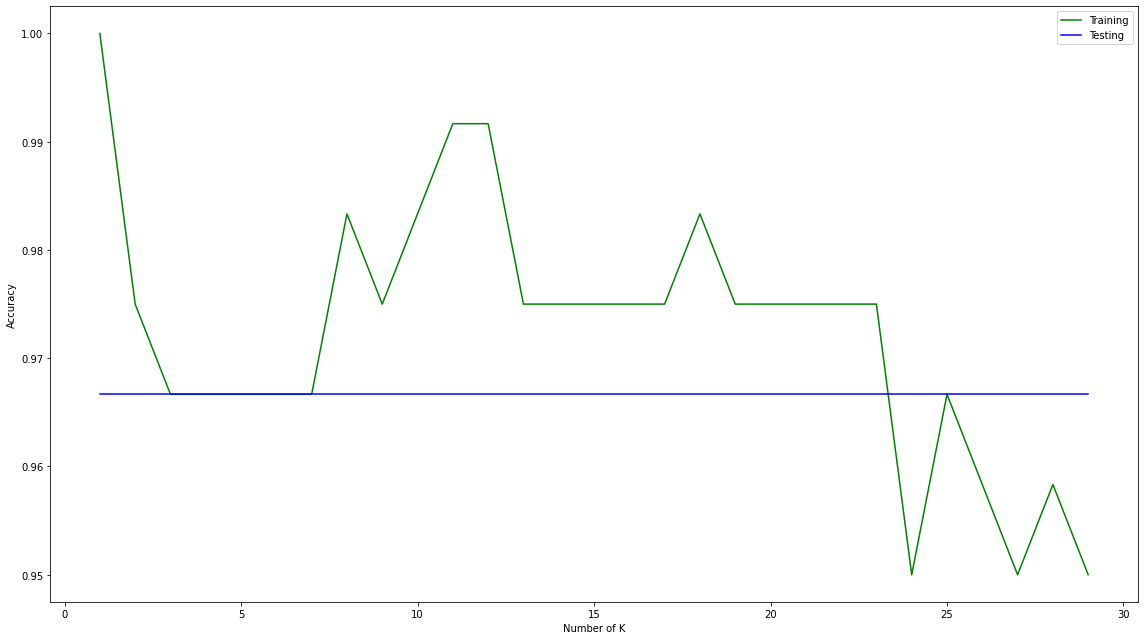

In [21]:
plt.plot(range(1,Ks), accTrain,"g")
plt.plot(range(1,Ks), accTest,"b")
plt.legend(("Training", "Testing"))
plt.ylabel("Accuracy")
plt.xlabel("Number of K")
plt.tight_layout()
plt.show()

SVM

In [27]:
X = data[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y = data["species"]
XTrain, XTest, YTrain, YTest = train_test_split(X, Y)
SVM = SVC().fit(XTrain, YTrain)
CTest  = SVM.predict(XTest)
CTrain  = SVM.predict(XTrain)
print("Train Accuracy: ", metrics.accuracy_score(YTrain, CTrain))
print("Test Accuracy: ", metrics.accuracy_score(YTest, CTest))

Train Accuracy:  0.9821428571428571
Test Accuracy:  0.9736842105263158


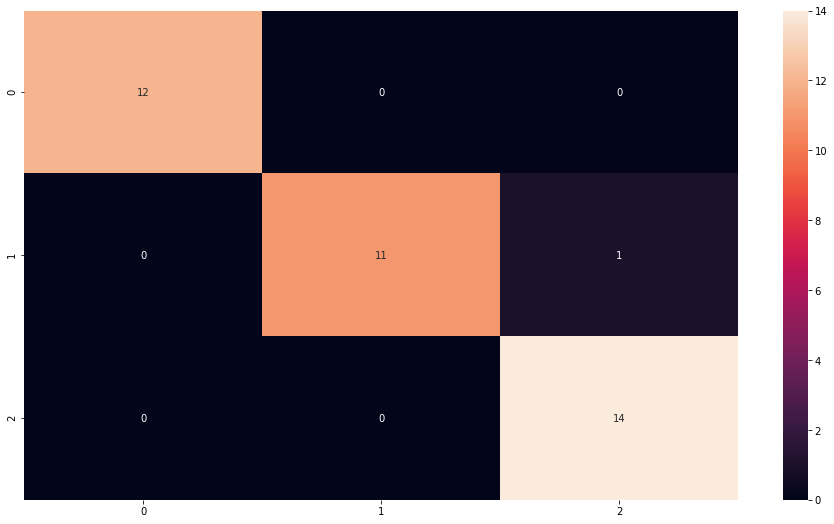

In [28]:
cf_matrix = metrics.confusion_matrix(YTest, CTest)
sb.heatmap(cf_matrix, annot=True)
plt.show()

Logistic Regression

In [29]:
X = data[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y = data["species"]
XTrain, XTest, YTrain, YTest = train_test_split(X, Y)
LGR = LogisticRegression(max_iter=10000).fit(XTrain, YTrain)
CTest  = LGR.predict(XTest)
CTrain  = LGR.predict(XTrain)
print("Train Accuracy: ", metrics.accuracy_score(YTrain, CTrain))
print("Test Accuracy: ", metrics.accuracy_score(YTest, CTest))

Train Accuracy:  0.9464285714285714
Test Accuracy:  0.9736842105263158


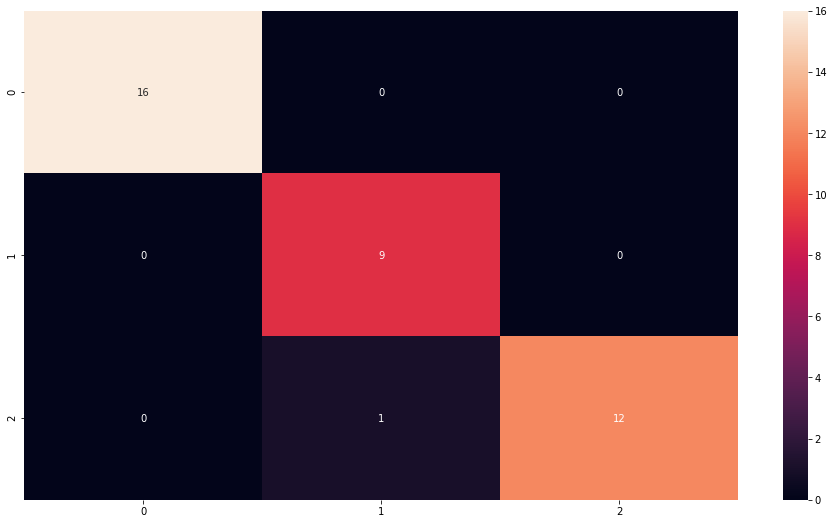

In [30]:
cf_matrix = metrics.confusion_matrix(YTest, CTest)
sb.heatmap(cf_matrix, annot=True)
plt.show()

**Among the three classification methods, each method resulted:**

KNN

Train Accuracy:  0.9666666666666667

Test Accuracy:  0.9666666666666667

SVM

Train Accuracy:  0.9821428571428571

Test Accuracy:  0.9736842105263158

Logistic Regression

Train Accuracy:  0.9464285714285714

Test Accuracy:  0.9736842105263158

Logistic Regression and KNN method both accuracy on the train accuracy and test accuracy are smaller than SVM method result with 98% Train Accuracy and 97% Test Accuracy. Hence, SVM is the best model method with better performance.